# OpenAI 机器人强化学习从入门到提高 **(草稿)**

> 除了试图直接去建立一个可以模拟成人大脑的程序之外， 为什么不试图建立一个可以模拟小孩大脑的程序呢?如果它接 受适当的教育，就会获得成人的大脑。 — 阿兰·图灵

## 学习目的

- 理论和仿真实践结合
- 了解掌握强化学习基本原理
- 掌握利用 Python 进行强化学习仿真

## 一. 引言介绍

强化学习 (Reinforcement learning) 是机器学习的一个子领域用于制定决策和运动自由度控制。强化学习主要研究在复杂未知的环境中，智体(agent)实现某个目标。强化学习最引人入胜的两个特点是

- **强化学习非常通用，可以用来解决需要作出一些列决策的所有问题：**例如，训练机器人跑步和弹跳，制定商品价格和库存管理，玩 Atari 游戏和棋盘游戏等等。

- **强化学习已经可以在许多复杂的环境中取得较好的实验结果：**例如 Deep RL 的 Alpha Go等

[Gym](https://gym.openai.com/docs/) 是一个研究和开发强化学习相关算法的仿真平台。

- 无需智体先验知识；
- 兼容常见的数值运算库如 TensorFlow、Theano 等

## 二. 强化学习的基本概念

强化学习也是机器学习中的一个重要分支。强化学习和监督学习的不同在 于，强化学习问题不需要给出“正确”策略作为监督信息，只需要给出策略的(延迟)回报，并通过调整策略来取得最大化的期望回报。

![](https://ws1.sinaimg.cn/large/c3a916a7gy1fuipsc9dnrj20iy05g74p.jpg)

### 2.1 术语

- 智体 (Agent): 执行动作对环境产生影响，感知外接环境状态(state)和反馈奖励(reward)，并进行学习和决策。
- 环境 (Environment)： 出了智体以外的所有事物，智体动作可以影响环境状态，反馈智体奖励。
- 状态 $s$ (State)：是环境的描述。
- 动作 $a$ (Action)：对智体行为的描述。
- 策略 $\pi$ (Policy)：智体根据环境的状态来决定下一步动作$a$的函数。
- 奖励 $r$ (Reward)：当智体完成动作之后，环境会响应的给智体一个奖励(标量值)$r$。
- 状态转移概率 ：智体从前一个状态完成动作后，环境在下个时间点转变成状态s的概率

### 2.2 马尔科夫过决策过程

#### 原理图



![](https://ws1.sinaimg.cn/large/c3a916a7gy1fujcxmkef7j20kp04vaa7.jpg)

#### 解释

- 智能体与环境的交互的过程可以看作是一个**马尔可夫决策过程**。马尔可夫过程(Markov process)是具有马尔可夫性的随机变量序列$s_0,s_1,...,s_t$ 下一个时刻的状态 $s_{t+1}$ 只取决于当前时刻的 $s_{t}$ 

$$p\left(s_{t+1} \mid s_t,...,s_0 \right) = p\left(s_{t+1} \mid s_{t}\right)$$

- 给定策略$\pi\left(a\mid s\right)$，轨迹

$$\tau = s_0,a_0,s_1,r_1,a_1,...,s_{T-1},s_T,r_T$$

### 强化学习优化的目标函数

- 总回报，折扣率 $\gamma \in \left[0,1\right]$

$$G_{T}=\sum_{t=0}^{T-1}\gamma ^{t} r_{t+1}$$

- 目标函数

$$J\left( \theta \right) = E\left[G\left(\tau \right)\right]$$

## 三. OpenAI 强化学习仿真环境

- A standard Python API for RL environments
- A set of tools to measure agent performance
- An online scoreboard for comparing and benchmarking approaches
- [ https://gym.openai.com/](https://gym.openai.com/)

### 3.1 环境安装

- pip 安装  
    ```
    pip3 install gym
    ```
- 源码安装  
    ```shell
    git clone https://github.com/openai/gym.git
    cd gym
    pip install -e .
    ```
- 验证安装是否成功

In [10]:
import gym
env = gym.make('Copy-v0')
env.reset()
env.render()


Total length of input instance: 3, step: 0
Observation Tape    :   DBC  
Output Tape         :   
Targets             :   DBC  








### 3.2 OpenAI 术语解释

- **观测** Observation (Object)：当前 step 执行后，环境的观测(类型为对象)。例如，从相机获取的像素点，机器人各个关节的角度或棋盘游戏当前的状态等；

- **奖励** Reward (Float): 执行上一步动作(action)后，智体(agent)获得的奖励(浮点类型)，不同的环境中奖励值变化范围也不相同，但是强化学习的目标就是使得总奖励值最大；

- **完成** Done (Boolen): 表示是否需要将环境重置 `env.reset`。大多数情况下，当 `Done` 为 `True` 时，就表明当前回合(episode)或者试验(tial)结束。例如当机器人摔倒或者掉出台面，就应当终止当前回合进行重置(reset);

- **信息** Info (Dict): 针对调试过程的诊断信息。在标准的智体仿真评估当中不会使用到这个 info，具体用到的时候再说。

![](https://ws1.sinaimg.cn/large/c3a916a7gy1fui6vljemkj20gw066t93.jpg)

总结来说，这就是一个强化学习的基本流程，在每个时间点上，智体执行 action，环境返回上一次 action 的观测和奖励，用图表示为

## 四. 第一个强化学习 Hello World

### 车杆模型

![](https://ws1.sinaimg.cn/large/c3a916a7gy1fuilrzjnj0j20hm0blmxu.jpg)

In [1]:
import gym
env = gym.make('CartPole-v0')
init_state = env.reset()
print('init state = ', init_state)
for _ in range(1000):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action) # take a random action
    if done: 
        env.render()
        break

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
init state =  [ 0.03829178 -0.01427857 -0.00701367  0.00567602]


### 概念解读

- 创建实例
    - 每个 Gym 环境都有唯一的命名，命名方式为 `([A-Za-z0-9]+-)v([0-9]+)`
    - 使用 `gym.make('CartPole-v0')` 创建环境

- 重置函数 reset
    - 用于重新开启一个新的回合(试验)
    - 返回回合的初始状态

- 执行(step)
    - 执行特定的动作，返回状态(state)
    - observation, reward, done, info
    
- 渲染(render)
    - 用于显示当前环境的状态
    - 用于调试和定性的分析不同策略的效果

### 空间(space)

In [2]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

print(env.observation_space.high)
print(env.observation_space.low)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Discrete(2)
Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


- 观测空间 `observation_space` 是一个 `Box` 类型，从 [box.py](https://github.com/openai/gym/blob/master/gym/spaces/box.py) 源码可知，表示一个 `n` 维的盒子，所以在上一节打印出来的 `observation` 是一个长度为 4 的数组。数组中的每个元素都具有上下界。

    - Type: Box(4)

Num | Observation | Min | Max
---|---|---|---
0 | Cart Position | -2.4 | 2.4
1 | Cart Velocity | -Inf | Inf
2 | Pole Angle | ~ -41.8&deg; | ~ 41.8&deg;
3 | Pole Velocity At Tip | -Inf | Inf

- 运动空间 `action_space` 是一个离散 `Discrete` 类型，从 [discrete.py](https://github.com/openai/gym/blob/master/gym/spaces/discrete.py) 源码可知，范围是一个 `{0,1,...,n-1}` 长度为 `n` 的非负整数集合，在 `CartPole-v0` 例子中，动作空间表示为 `{0,1}`。

    - Type: Discrete(2)

Num | Action
--- | ---
0 | Push cart to the left
1 | Push cart to the right


### 回合终止条件(当满足下列条件之一时，终止回合)

- 1. 杆的角度超过 $\pm12$ 度
- 2. 以中点为原点，小车位置超过 $\pm24$ 
- 3. 回合长度超过 200 次


### 求解 Cartpole 杆车模型

#### 求解算法

- The random guessing algorithm: generate 10,000 random configurations of the model's parameters, and pick the one that achieves the best cumulative reward. It is important to choose the distribution over the parameters correctly.
- The hill-climbing algorithm: Start with a random setting of the parameters, add a small amount of noise to the parameters, and evaluate the new parameter configuration. If it performs better than the old configuration, discard the old configuration and accept the new one. Repeat this process for some number of iterations. How long does it take to achieve perfect performance?
- Policy gradient algorithm: here, instead of choosing the action as a deterministic function of the sign of the weighted sum, make it so that action is chosen randomly, but where the distribution over actions (of which there are two) depends on the numerical output of the inner product. Policy gradient prescribes a principled parameter update rule [1, 2]. Your goal is to implement this algorithm for the simple linear model, and see how long it takes to converge.

#### 算法步骤

- 定义策略 Policy




#### 代码求解

In [9]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)
env.seed(0)
np.random.seed(0)

# Define policy
class Policy():
    def __init__(self, s_size=4, a_size=2):
        self.w = 1e-4*np.random.rand(s_size, a_size)  # weights for simple linear policy: state_space x action_space
        
    def forward(self, state):
        x = np.dot(state, self.w)
        return np.exp(x)/sum(np.exp(x))
    
    def act(self, state):
        probs = self.forward(state)
        #action = np.random.choice(2, p=probs) # option 1: stochastic policy
        action = np.argmax(probs)              # option 2: deterministic policy
        return action

    
policy = Policy()
    
def hill_climbing(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100, noise_scale=1e-2):
    """Implementation of hill climbing with adaptive noise scaling.
        
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        noise_scale (float): standard deviation of additive noise
    """
    scores_deque = deque(maxlen=100)
    scores = []
    best_R = -np.Inf
    best_w = policy.w
    for i_episode in range(1, n_episodes+1):
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action = policy.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])

        if R >= best_R: # found better weights
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3, noise_scale / 2)
            policy.w += noise_scale * np.random.rand(*policy.w.shape) 
        else: # did not find better weights
            noise_scale = min(2, noise_scale * 2)
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            policy.w = best_w
            break
        
    return scores
            
scores = hill_climbing()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
observation space: Box(4,)
action space: Discrete(2)
Episode 100	Average Score: 175.24
Environment solved in 13 episodes!	Average Score: 196.21


- 绘制分数 reward

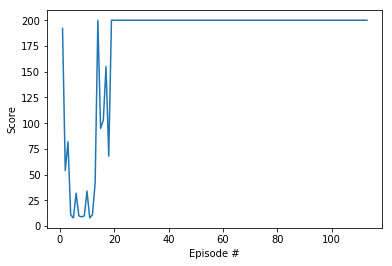

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

- 结果

In [ ]:
env = gym.make('CartPole-v0')
state = env.reset()
for t in range(200):
    action = policy.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()
print('env.close()')

## 五. OpenAI 强化学习进阶

In [4]:
print('Hello reinforcement learning !\n'*4)

Hello reinforcement learning !
Hello reinforcement learning !
Hello reinforcement learning !
Hello reinforcement learning !



## 六. 总结与扩展

- 项目地址
- 扩展阅读文献 1
- 扩展阅读文献 2
